# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters

In [32]:
# import cluster libraries
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [36]:
df = pd.read_excel("D:\Excelr_assignments\Clustering\data\EastWestAirlines.xlsx",sheet_name="data")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [37]:
air =df.drop(['ID#'], axis=1)

In [38]:
air.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
5,16420,0,1,1,1,0,0,0,0,6942,0
6,84914,0,3,1,1,27482,25,0,0,6994,0
7,20856,0,1,1,1,5250,4,250,1,6938,1
8,443003,0,3,2,1,1753,43,3850,12,6948,1
9,104860,0,3,1,1,28426,28,1150,3,6931,1


In [39]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [40]:
scaler = StandardScaler()
scaled_air = scaler.fit_transform (air[['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?']])


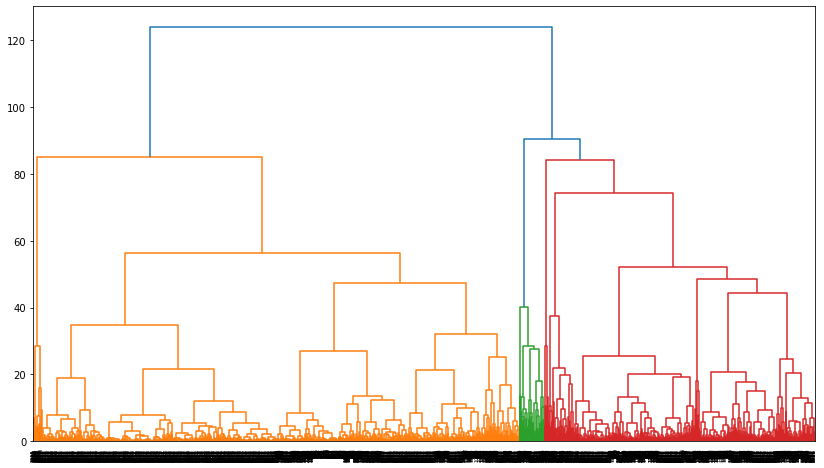

In [41]:
# Create Dendogram
plt.figure(figsize=(14,8))
dendogram = sch.dendrogram(sch.linkage(scaled_air,method="ward"))

In [42]:
# creating clusters and associating with the actual dataframe
h_clusters = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean',linkage = 'single')
h_clusters.fit(scaled_air)
air["H_cluster_ID"] = h_clusters.labels_


In [43]:
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,H_cluster_ID
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [44]:
air.groupby("H_cluster_ID").mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
H_cluster_ID,,,,,,,,,,,
0,73660.086367,144.316847,2.063771,1.00703,1.012302,17118.787095,11.555611,451.558122,1.353753,4119.410746,0.370073
1,160114.000000,500.000000,1.000000,1.00000,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.000000
2,52231.400000,66.666667,1.000000,3.00000,1.000000,20410.466667,18.933333,692.666667,3.200000,4075.533333,0.400000


**Using K Means**

In [45]:
air_k = pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
air_k

FileNotFoundError: [Errno 2] No such file or directory: 'EastWestAirlines.xlsx'

In [ ]:
df = air_k.drop(['ID#'],axis=1)
df
df.head(10)

In [ ]:
scaler = StandardScaler()
scaled_air_k = scaler.fit_transform (air_k[['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?']])

In [ ]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_air_k)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
k = 3
clusters_k = KMeans(k)
clusters_k.fit(scaled_air_k)
air["K_Clusters"] = clusters_k.labels_

In [ ]:
air.groupby('K_Clusters').mean()


**DBSCAN CLUSTERING**


In [ ]:
air_d = pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
air_d

In [ ]:
air_d1 = air_d.drop(["ID#"],axis=1)
air_d1

In [ ]:
#Normalizing Function
scaler = StandardScaler()
scaled_air_d = scaler.fit_transform(air_d[['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?']])

In [ ]:
#fitting The DBSCAN model to  get clusters
db_clusters = DBSCAN(eps=1.8, min_samples=12)
db_clusters.fit(scaled_air_d)
air["DB_Clusters"] = db_clusters.labels_

In [ ]:
air.groupby("DB_Clusters").mean()

In [ ]:
#Final Dataframe With all three clustering methods results
air